In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlp

In [ ]:
import io
from google.colab import files
uploaded=files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
datafile=pd.read_csv("Social_Network_Ads.csv")

In [ ]:
datafile

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
datafile.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
datafile.shape

(400, 5)

In [26]:
x=datafile.iloc[:,[2,3]].values
y=datafile.iloc[:,4].values

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(x_train,y_train)


LogisticRegression()

In [49]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,  
intercept_scaling=1, l1_ratio=None, max_iter=100,  
multi_class='warn', n_jobs=None, penalty='l2',  
random_state=0, solver='warn', tol=0.0001, verbose=0,  
warm_start=False)
y_pred= classifier.predict(x_test)



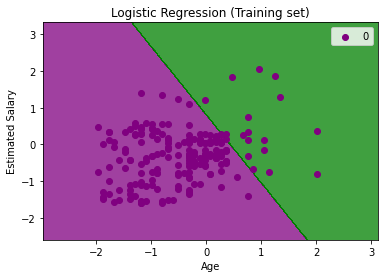

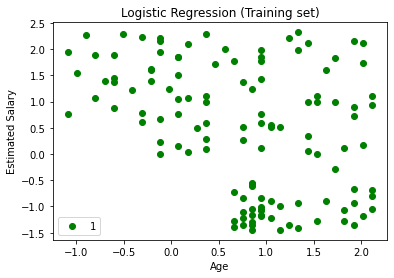

In [50]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mlp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mlp.xlim(x1.min(), x1.max())  
mlp.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mlp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  c = ListedColormap(('purple', 'green'))(i), label = j)  
    mlp.title('Logistic Regression (Training set)')  
    mlp.xlabel('Age')  
    mlp.ylabel('Estimated Salary')  
    mlp.legend()  
    mlp.show()




